In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Masterlist_1891763_mhcii.csv")
df

,peptide,mixmhcii_aff,allele,protein_id,number_binding_alleles,protein_sequence,antigen_score,probable_type,population_coverage,genot_freq,length,genot_freq_sum_per_epitope,s_mixmhcii_aff,sw_mixmhcii_aff,aff_score,imm_score,rank_score
0,LGDLVATVSEAAAA,7.910,HLA-DQA1*03:01/DQB1*04:01,P03095,48,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.6301,ANTIGEN,0.869,0.00,14,66.33,0.92090,0.209092,0.763835,0.318619,0.661819
1,LGDLVATVSEAAAA,8.370,HLA-DRB1*04:10,P03095,48,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.6301,ANTIGEN,0.869,0.05,14,66.33,0.91630,0.163071,0.763835,0.318619,0.661819
2,LGDLVATVSEAAAA,0.641,HLA-DRB1*15:03,P03095,48,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.6301,ANTIGEN,0.869,0.02,14,66.33,0.99359,0.936310,0.763835,0.318619,0.661819
3,LGDLVATVSEAAAA,1.020,HLA-DRB1*08:02,P03095,48,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.6301,ANTIGEN,0.869,0.22,14,66.33,0.98980,0.898393,0.763835,0.318619,0.661819
4,LGDLVATVSEAAAA,0.197,HLA-DRB1*04:06,P03095,48,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.6301,ANTIGEN,0.869,0.06,14,66.33,0.99803,0.980730,0.763835,0.318619,0.661819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24612,IVNSPANLYNYISDY,9.530,HLA-DQA1*01:02/DQB1*06:02,P03095,1,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.0000,NON-ANTIGEN,0.000,0.00,15,0.00,0.90470,0.047021,0.047021,0.000000,0.018808
24613,NGAGKPVQGTSFHFF,9.960,HLA-DPA1*01:03/DPB1*02:02,P03089,1,MAPTKRKGERKDPVQVPKLLIRGGVEVLEVKTGVDSITEVECFLTP...,0.0839,NON-ANTIGEN,0.000,0.00,15,0.00,0.90040,0.004002,0.004002,0.042425,0.014328
24614,DTQENCTFHICKGFQ,9.780,HLA-DQA1*01:03/DQB1*06:01,P03072,1,MDKVLNREESMELMDLLGLDRSAWGNIPVMRKAYLKKCKELHPDKG...,0.0000,NON-ANTIGEN,0.000,0.00,15,0.00,0.90220,0.022010,0.022010,0.000000,0.008804
24615,EKWDEDLFCHEEMF,9.890,HLA-DQA1*03:01/DQB1*04:01,P03072,1,MDKVLNREESMELMDLLGLDRSAWGNIPVMRKAYLKKCKELHPDKG...,0.0000,NON-ANTIGEN,0.000,0.00,14,0.00,0.90110,0.011005,0.011005,0.000000,0.004402


In [4]:
df.columns

#one-to-one relationship: iedb_aff-aff_score, 

Index(['peptide', 'mixmhcii_aff', 'allele', 'protein_id',
       'number_binding_alleles', 'protein_sequence', 'antigen_score',
       'probable_type', 'population_coverage', 'genot_freq', 'length',
       'genot_freq_sum_per_epitope', 's_mixmhcii_aff', 'sw_mixmhcii_aff',
       'aff_score', 'imm_score', 'rank_score'],
      dtype='object')

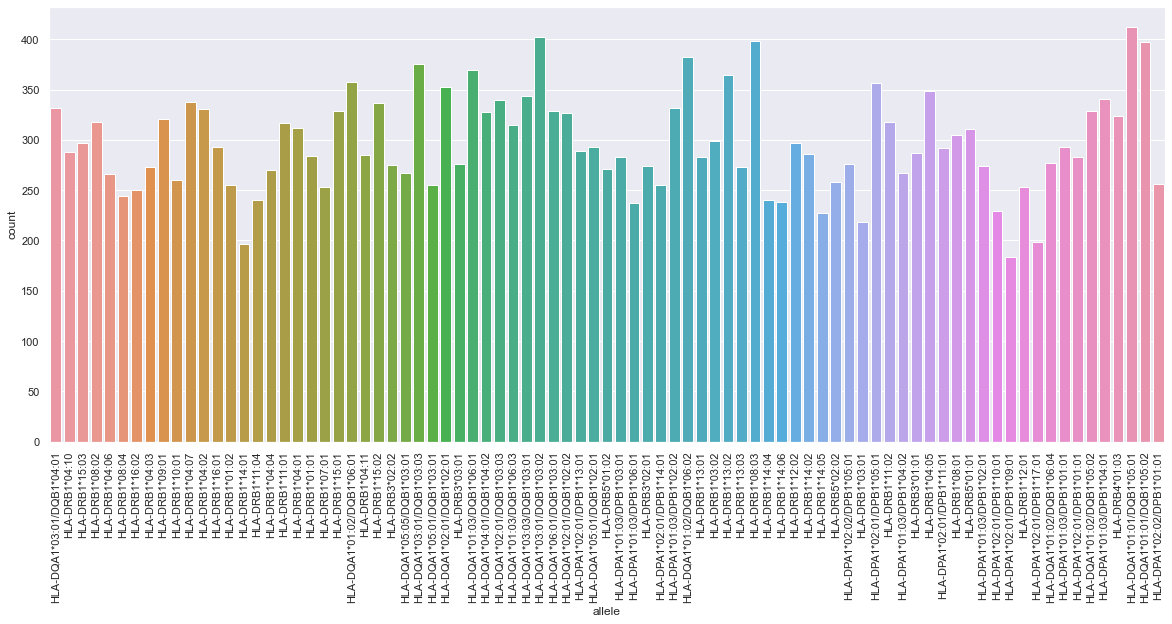

In [4]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'allele', data = df)
plt.xticks(rotation = 90)
plt.show()

In [5]:
df['allele'].value_counts()

HLA-DQA1*01:01/DQB1*05:01    412
HLA-DQA1*03:01/DQB1*03:02    402
HLA-DRB1*08:03               398
HLA-DQA1*01:01/DQB1*05:02    397
HLA-DQA1*01:02/DQB1*06:02    383
                            ... 
HLA-DRB1*14:05               227
HLA-DRB1*03:01               218
HLA-DPA1*02:01/DPB1*17:01    199
HLA-DRB1*14:01               197
HLA-DPA1*02:01/DPB1*09:01    184
Name: allele, Length: 83, dtype: int64

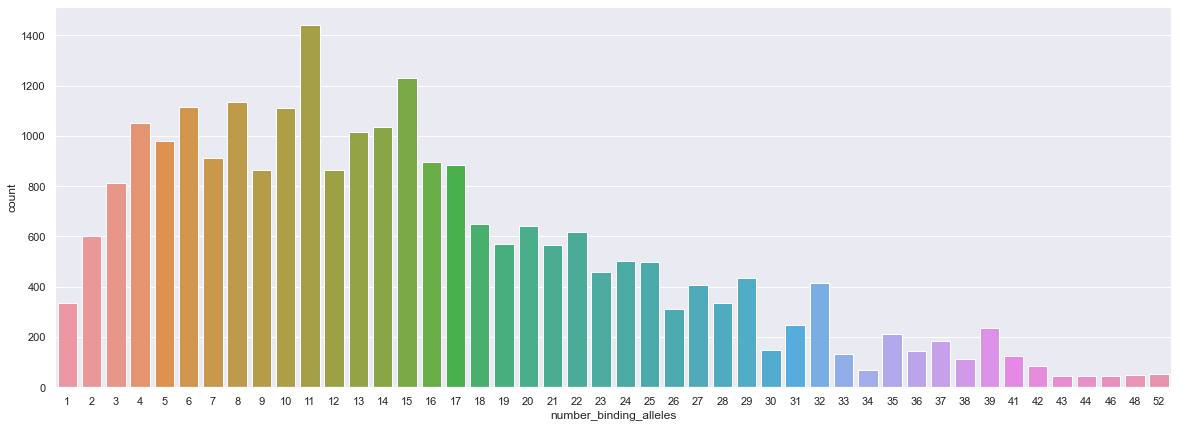

In [7]:
plt.figure(figsize = (20, 7))
sns.countplot(x = 'number_binding_alleles', data = df)
plt.show()

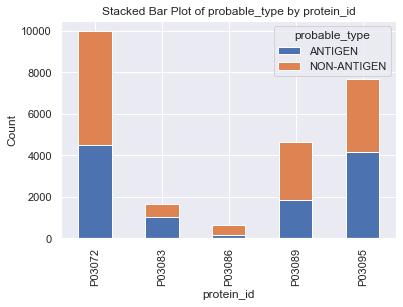

In [8]:
#should we add this?
grouped = df.groupby(['protein_id', 'probable_type']).size().reset_index(name='count')
pivot = grouped.pivot(index='protein_id', columns='probable_type', values='count')
ax = pivot.plot(kind='bar', stacked=True)
ax.set_xlabel('protein_id')
ax.set_ylabel('Count')
ax.set_title('Stacked Bar Plot of probable_type by protein_id')

# Show the plot
plt.show()

<AxesSubplot:xlabel='length', ylabel='count'>

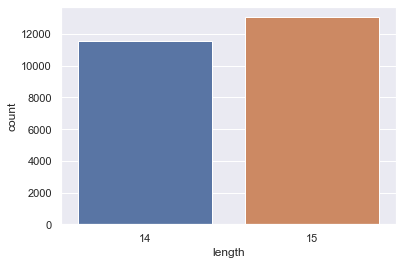

In [9]:
sns.countplot(x = 'length', data = df)

In [ ]:
#checking mixmhc2

<AxesSubplot: xlabel='aff_score', ylabel='sw_mixmhcii_aff'>

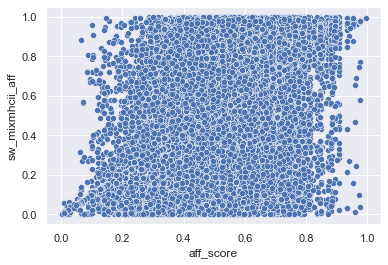

In [5]:
sns.scatterplot(x=df['aff_score'], y=df['sw_mixmhcii_aff'], )


<AxesSubplot:>

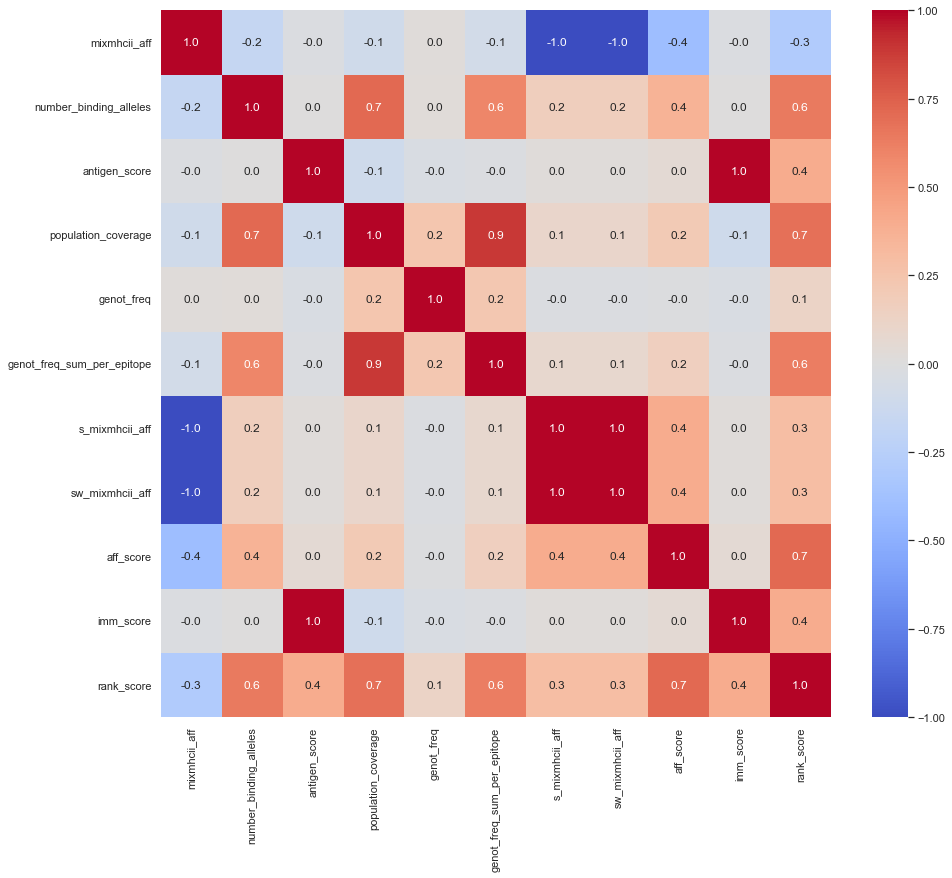

In [10]:
#IMPORTANT
num_features = ['mixmhcii_aff', 'number_binding_alleles', 'antigen_score', 'population_coverage', 'genot_freq',
               'genot_freq_sum_per_epitope', 's_mixmhcii_aff', 'sw_mixmhcii_aff', 'aff_score', 'imm_score', 'rank_score']
correlation = df[num_features].corr()
plt.figure(figsize = (15, 13))
sns.heatmap(data = correlation, cmap = 'coolwarm', annot = True, fmt = '.1f')

### to summarize:
It makes sense considering the formulas: 
sw_mix is inversly proportional to the original mix score, 0.4 correlated to affinity score and thus 0.3 correlated to the rank score.

Rank is correlated 0.7 with the affinity score (that inc. mix in calc), 0.4 of imm score (wich is 1-to-1 correlated with antigenicity score), population coverage has 0.8 correlation with rank (and proportional to gen_freq_sum and num of binding alleles) 

<AxesSubplot: xlabel='genot_freq', ylabel='genot_freq_sum_per_epitope'>

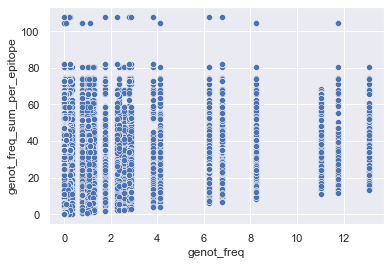

In [7]:
#pair graphs
#g_freq_sum~pop_freq
sns.scatterplot(x=df['genot_freq'], y=df['genot_freq_sum_per_epitope'])

#NO genotypic freq sum between 80 and 100..

<AxesSubplot: xlabel='mixmhcii_aff', ylabel='sw_mixmhcii_aff'>

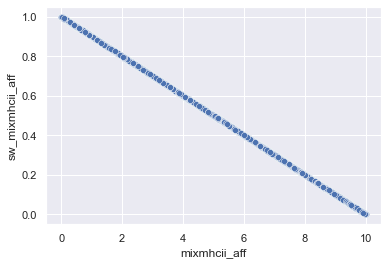

In [8]:
#checking the relationship
sns.scatterplot(x=df['mixmhcii_aff'], y=df['sw_mixmhcii_aff'])

<AxesSubplot: xlabel='population_coverage', ylabel='aff_score'>

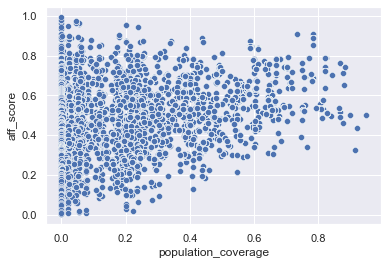

In [9]:
sns.scatterplot(x=df['population_coverage'], y=df['aff_score'])

In [10]:
len(df['allele'].unique())

83

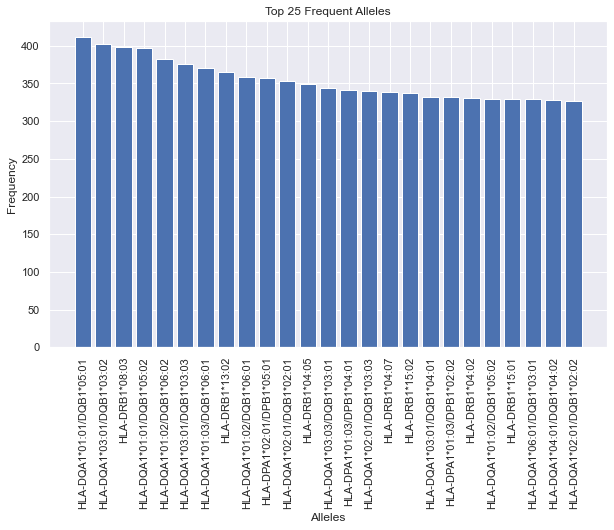

In [11]:
#IMPORTANT
top_alleles = df['allele'].value_counts().head(25)

# Create the bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(top_alleles.index, top_alleles.values)
plt.title('Top 25 Frequent Alleles')
plt.xlabel('Alleles')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [12]:
len(df['number_binding_alleles'].unique())

46

### Top 20 Number of bindings that most of the peptides are having

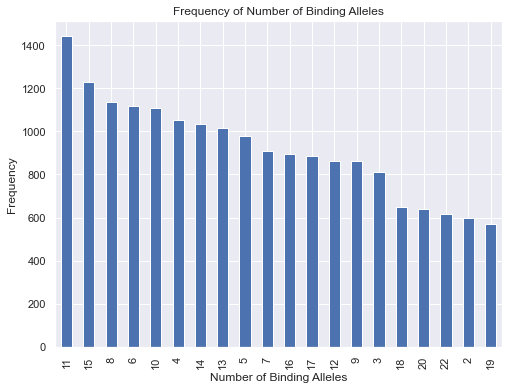

In [13]:
freq = df['number_binding_alleles'].value_counts().head(20)

# Plot a bar graph of the frequency of number of binding alleles
plt.figure(figsize=(8,6))
freq.plot(kind='bar')
plt.title('Frequency of Number of Binding Alleles')
plt.xlabel('Number of Binding Alleles')
plt.ylabel('Frequency')
plt.show()

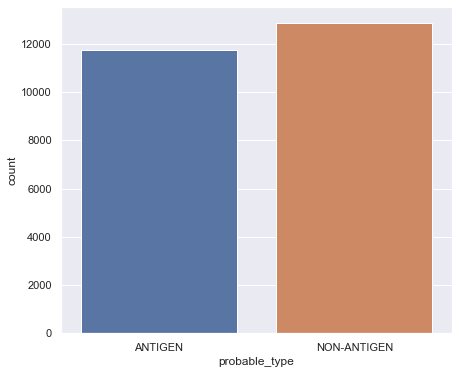

In [14]:
plt.figure(figsize = (7, 6))
sns.countplot(x = 'probable_type', data = df)
plt.show()

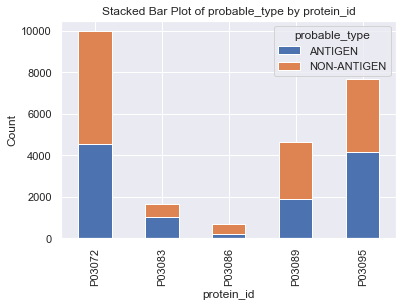

In [15]:
grouped = df.groupby(['protein_id', 'probable_type']).size().reset_index(name='count')
pivot = grouped.pivot(index='protein_id', columns='probable_type', values='count')
ax = pivot.plot(kind='bar', stacked=True)
ax.set_xlabel('protein_id')
ax.set_ylabel('Count')
ax.set_title('Stacked Bar Plot of probable_type by protein_id')

# Show the plot
plt.show()

<AxesSubplot: xlabel='length', ylabel='count'>

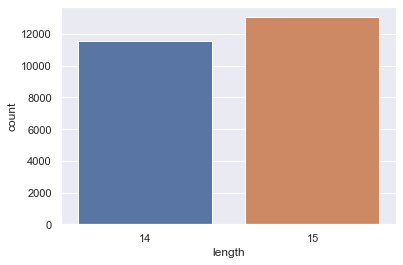

In [16]:
#IMPORTANT
sns.countplot(x = 'length', data = df)

Most of the peptides having their length as 15

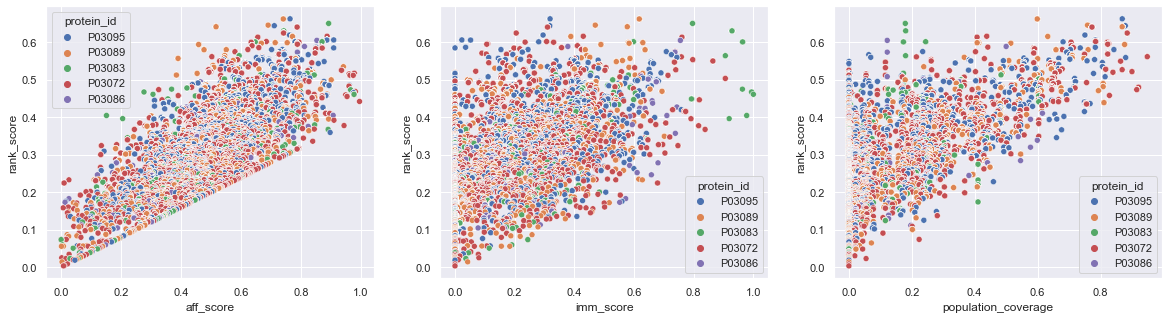

In [17]:
#IMPORTANT - RANK formula pairgraphs
calc_scores = ['aff_score', 'imm_score', 'population_coverage']

fig, axes = plt.subplots(1, 3, figsize = (20, 5)) 

for param, ax in zip(calc_scores, axes.flatten()):
    sns.scatterplot(data = df, x =param, y = 'rank_score', hue = 'protein_id', ax = ax)


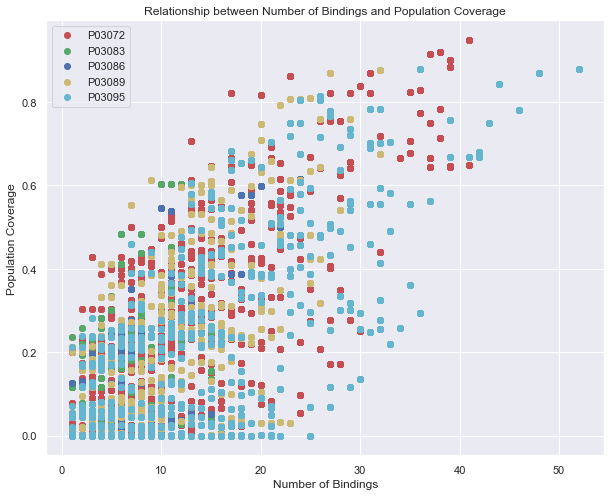

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
hue_col = 'protein_id' 
colors = ['r', 'g', 'b', 'y', 'c'] # add more colors as needed
hue_levels = sorted(list(set(df[hue_col])))
for i, level in enumerate(hue_levels):
    subset_df = df[df[hue_col]==level]
    ax.scatter(subset_df['number_binding_alleles'], subset_df['population_coverage'], color=colors[i], label=level)
plt.xlabel('Number of Bindings')
plt.ylabel('Population Coverage')
plt.title('Relationship between Number of Bindings and Population Coverage')
plt.legend()
plt.show()

<AxesSubplot: xlabel='number_binding_alleles', ylabel='genot_freq_sum_per_epitope'>

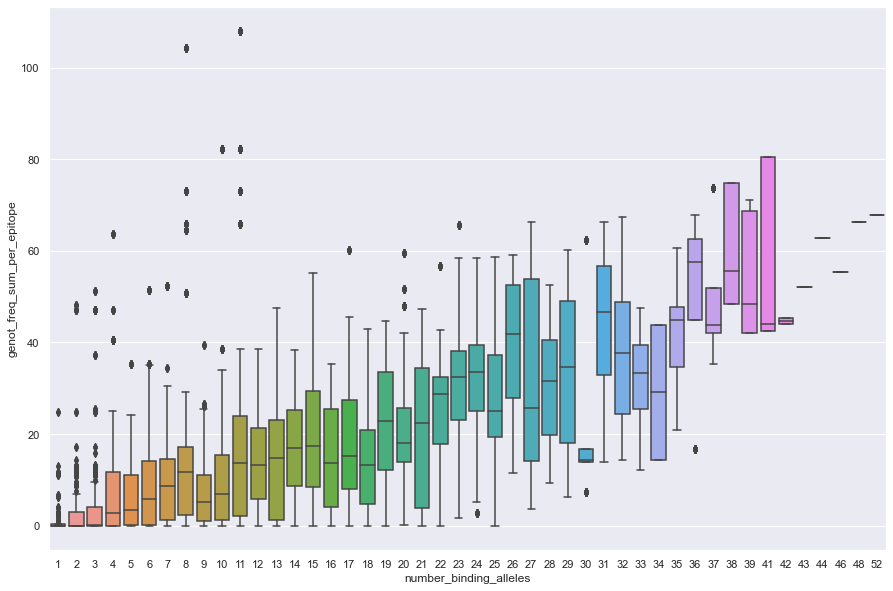

In [21]:
plt.figure(figsize = (15, 10))
sns.boxplot(x = 'number_binding_alleles', y = 'genot_freq_sum_per_epitope', data = df)

#after excluding 25aa epitopes the relationship seems to approximate linear rather than algorithmic.

In [3]:
df['genot/pop'] = df['genot_freq_sum_per_epitope']/(df['population_coverage']*100)
df.head()

,peptide,mixmhcii_aff,allele,protein_id,number_binding_alleles,protein_sequence,antigen_score,probable_type,population_coverage,genot_freq,length,genot_freq_sum_per_epitope,s_mixmhcii_aff,sw_mixmhcii_aff,aff_score,imm_score,rank_score,genot/pop
0,LGDLVATVSEAAAA,7.910,HLA-DQA1*03:01/DQB1*04:01,P03095,48,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.6301,ANTIGEN,0.869,0.00,14,66.33,0.92090,0.209092,0.763835,0.318619,0.661819,0.763291
1,LGDLVATVSEAAAA,8.370,HLA-DRB1*04:10,P03095,48,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.6301,ANTIGEN,0.869,0.05,14,66.33,0.91630,0.163071,0.763835,0.318619,0.661819,0.763291
2,LGDLVATVSEAAAA,0.641,HLA-DRB1*15:03,P03095,48,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.6301,ANTIGEN,0.869,0.02,14,66.33,0.99359,0.936310,0.763835,0.318619,0.661819,0.763291
3,LGDLVATVSEAAAA,1.020,HLA-DRB1*08:02,P03095,48,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.6301,ANTIGEN,0.869,0.22,14,66.33,0.98980,0.898393,0.763835,0.318619,0.661819,0.763291
4,LGDLVATVSEAAAA,0.197,HLA-DRB1*04:06,P03095,48,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.6301,ANTIGEN,0.869,0.06,14,66.33,0.99803,0.980730,0.763835,0.318619,0.661819,0.763291


<AxesSubplot:xlabel='genot/pop'>

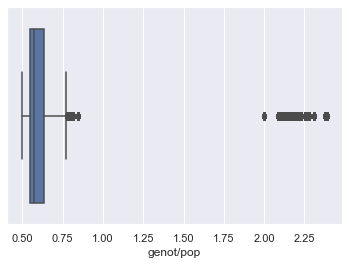

In [4]:
sns.boxplot(df['genot/pop'])

<AxesSubplot:xlabel='genot/pop', ylabel='Count'>

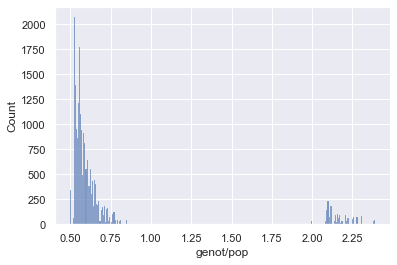

In [5]:
sns.histplot(df['genot/pop'])

In [4]:
def genot_pop_ratio(ratio):
    if ratio <= 1:
        return 'Less than 1'
    else:
        return 'Greater than 2'
    
df['genot_pop_ratio'] = df['genot/pop'].apply(genot_pop_ratio)
df.head()

,peptide,mixmhcii_aff,allele,protein_id,number_binding_alleles,protein_sequence,antigen_score,probable_type,population_coverage,genot_freq,length,genot_freq_sum_per_epitope,s_mixmhcii_aff,sw_mixmhcii_aff,aff_score,imm_score,rank_score,genot/pop,genot_pop_ratio
0,LGDLVATVSEAAAA,7.910,HLA-DQA1*03:01/DQB1*04:01,P03095,48,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.6301,ANTIGEN,0.869,0.00,14,66.33,0.92090,0.209092,0.763835,0.318619,0.661819,0.763291,Less than 1
1,LGDLVATVSEAAAA,8.370,HLA-DRB1*04:10,P03095,48,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.6301,ANTIGEN,0.869,0.05,14,66.33,0.91630,0.163071,0.763835,0.318619,0.661819,0.763291,Less than 1
2,LGDLVATVSEAAAA,0.641,HLA-DRB1*15:03,P03095,48,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.6301,ANTIGEN,0.869,0.02,14,66.33,0.99359,0.936310,0.763835,0.318619,0.661819,0.763291,Less than 1
3,LGDLVATVSEAAAA,1.020,HLA-DRB1*08:02,P03095,48,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.6301,ANTIGEN,0.869,0.22,14,66.33,0.98980,0.898393,0.763835,0.318619,0.661819,0.763291,Less than 1
4,LGDLVATVSEAAAA,0.197,HLA-DRB1*04:06,P03095,48,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.6301,ANTIGEN,0.869,0.06,14,66.33,0.99803,0.980730,0.763835,0.318619,0.661819,0.763291,Less than 1


<AxesSubplot:xlabel='population_coverage', ylabel='genot_freq_sum_per_epitope'>

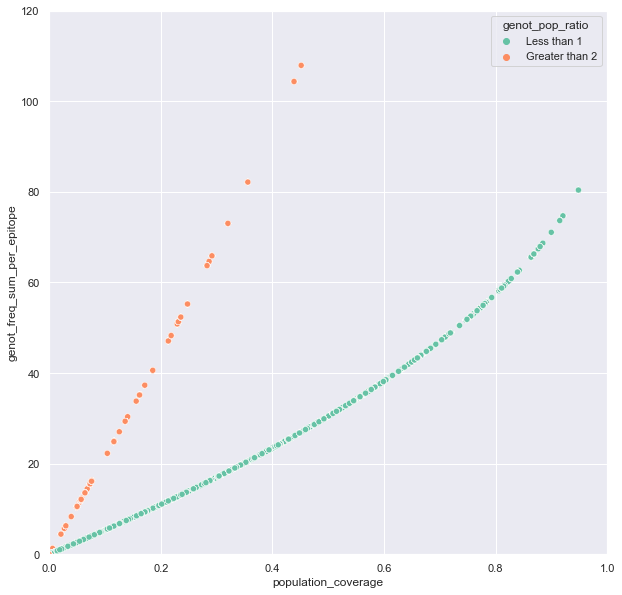

In [6]:
plt.figure(figsize = (10, 10))
plt.xlim([0,1])
plt.ylim([0,120])
sns.scatterplot(data = df, x = 'population_coverage', y = 'genot_freq_sum_per_epitope', hue = 'genot_pop_ratio',
                palette = 'Set2')

For JCV, the variation depends on the ratio between genot_freq_sum_per_epitope & population_coverage. Here the ratio range is (0,1) U (2,3). If the ratio <= 1, then it follows a non-linear relationship. If the ratio >= 2, the relationship becomes linear. What causes the ratio to increase over 2 is still unclear.

In [8]:
df_less_1 = df[df['genot_pop_ratio'] == 'Less than 1']
df_less_1.head()

,peptide,mixmhcii_aff,allele,protein_id,number_binding_alleles,protein_sequence,antigen_score,probable_type,population_coverage,genot_freq,length,genot_freq_sum_per_epitope,s_mixmhcii_aff,sw_mixmhcii_aff,aff_score,imm_score,rank_score,genot/pop,genot_pop_ratio
0,LGDLVATVSEAAAA,7.910,HLA-DQA1*03:01/DQB1*04:01,P03095,48,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.6301,ANTIGEN,0.869,0.00,14,66.33,0.92090,0.209092,0.763835,0.318619,0.661819,0.763291,Less than 1
1,LGDLVATVSEAAAA,8.370,HLA-DRB1*04:10,P03095,48,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.6301,ANTIGEN,0.869,0.05,14,66.33,0.91630,0.163071,0.763835,0.318619,0.661819,0.763291,Less than 1
2,LGDLVATVSEAAAA,0.641,HLA-DRB1*15:03,P03095,48,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.6301,ANTIGEN,0.869,0.02,14,66.33,0.99359,0.936310,0.763835,0.318619,0.661819,0.763291,Less than 1
3,LGDLVATVSEAAAA,1.020,HLA-DRB1*08:02,P03095,48,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.6301,ANTIGEN,0.869,0.22,14,66.33,0.98980,0.898393,0.763835,0.318619,0.661819,0.763291,Less than 1
4,LGDLVATVSEAAAA,0.197,HLA-DRB1*04:06,P03095,48,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.6301,ANTIGEN,0.869,0.06,14,66.33,0.99803,0.980730,0.763835,0.318619,0.661819,0.763291,Less than 1


In [9]:
df_less_1['allele'].unique()

array(['HLA-DQA1*03:01/DQB1*04:01', 'HLA-DRB1*04:10', 'HLA-DRB1*15:03',
       'HLA-DRB1*08:02', 'HLA-DRB1*04:06', 'HLA-DRB1*08:04',
       'HLA-DRB1*16:02', 'HLA-DRB1*04:03', 'HLA-DRB1*09:01',
       'HLA-DRB1*10:01', 'HLA-DRB1*04:07', 'HLA-DRB1*04:02',
       'HLA-DRB1*16:01', 'HLA-DRB1*01:02', 'HLA-DRB1*14:01',
       'HLA-DRB1*11:04', 'HLA-DRB1*04:04', 'HLA-DRB1*11:01',
       'HLA-DRB1*04:01', 'HLA-DRB1*01:01', 'HLA-DRB1*07:01',
       'HLA-DRB1*15:01', 'HLA-DQA1*01:02/DQB1*06:01', 'HLA-DRB1*04:11',
       'HLA-DRB1*15:02', 'HLA-DRB3*02:02', 'HLA-DQA1*05:05/DQB1*03:01',
       'HLA-DQA1*03:01/DQB1*03:03', 'HLA-DQA1*05:01/DQB1*03:01',
       'HLA-DQA1*02:01/DQB1*02:01', 'HLA-DRB3*03:01',
       'HLA-DQA1*01:03/DQB1*06:01', 'HLA-DQA1*04:01/DQB1*04:02',
       'HLA-DQA1*02:01/DQB1*03:03', 'HLA-DQA1*01:03/DQB1*06:03',
       'HLA-DQA1*03:03/DQB1*03:01', 'HLA-DQA1*03:01/DQB1*03:02',
       'HLA-DQA1*06:01/DQB1*03:01', 'HLA-DQA1*02:01/DQB1*02:02',
       'HLA-DPA1*02:01/DPB1*13:01', 'HL

In [10]:
len(df_less_1['allele'].unique())

83

In [11]:
df_greater_2 = df[df['genot_pop_ratio'] == 'Greater than 2']
df_greater_2.head()

,peptide,mixmhcii_aff,allele,protein_id,number_binding_alleles,protein_sequence,antigen_score,probable_type,population_coverage,genot_freq,length,genot_freq_sum_per_epitope,s_mixmhcii_aff,sw_mixmhcii_aff,aff_score,imm_score,rank_score,genot/pop,genot_pop_ratio
1996,IGLTPETYAVITGA,0.927,HLA-DQA1*03:01/DQB1*04:01,P03095,10,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,1.3154,ANTIGEN,0.0,0.0,14,0.0,0.99073,0.907698,0.858076,0.66515,0.542775,NaN,Greater than 2
1997,IGLTPETYAVITGA,0.725,HLA-DQA1*02:01/DQB1*03:03,P03095,10,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,1.3154,ANTIGEN,0.0,0.0,14,0.0,0.99275,0.927906,0.858076,0.66515,0.542775,NaN,Greater than 2
1998,IGLTPETYAVITGA,8.800,HLA-DQA1*01:02/DQB1*06:01,P03095,10,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,1.3154,ANTIGEN,0.0,0.0,14,0.0,0.91200,0.120053,0.858076,0.66515,0.542775,NaN,Greater than 2
1999,IGLTPETYAVITGA,0.424,HLA-DQA1*04:01/DQB1*04:02,P03095,10,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,1.3154,ANTIGEN,0.0,0.0,14,0.0,0.99576,0.958020,0.858076,0.66515,0.542775,NaN,Greater than 2
2000,IGLTPETYAVITGA,3.570,HLA-DQA1*06:01/DQB1*03:01,P03095,10,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,1.3154,ANTIGEN,0.0,0.0,14,0.0,0.96430,0.643282,0.858076,0.66515,0.542775,NaN,Greater than 2


In [12]:
len(df_greater_2['allele'].unique())

78

In [13]:
df_merge = pd.merge(df_less_1, df_greater_2, on = 'allele', how = 'inner')
df_merge

,peptide_x,mixmhcii_aff_x,allele,protein_id_x,number_binding_alleles_x,protein_sequence_x,antigen_score_x,probable_type_x,population_coverage_x,genot_freq_x,...,genot_freq_y,length_y,genot_freq_sum_per_epitope_y,s_mixmhcii_aff_y,sw_mixmhcii_aff_y,aff_score_y,imm_score_y,rank_score_y,genot/pop_y,genot_pop_ratio_y
0,LGDLVATVSEAAAA,7.91,HLA-DQA1*03:01/DQB1*04:01,P03095,48,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.6301,ANTIGEN,0.8690,0.0,...,0.0,14,0.00,0.99073,0.907698,0.858076,0.665150,0.542775,NaN,Greater than 2
1,LGDLVATVSEAAAA,7.91,HLA-DQA1*03:01/DQB1*04:01,P03095,48,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.6301,ANTIGEN,0.8690,0.0,...,0.0,14,0.00,0.99685,0.968924,0.935210,0.502377,0.524797,NaN,Greater than 2
2,LGDLVATVSEAAAA,7.91,HLA-DQA1*03:01/DQB1*04:01,P03095,48,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.6301,ANTIGEN,0.8690,0.0,...,0.0,14,0.00,0.99685,0.968924,0.935210,0.502377,0.524797,NaN,Greater than 2
3,LGDLVATVSEAAAA,7.91,HLA-DQA1*03:01/DQB1*04:01,P03095,48,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.6301,ANTIGEN,0.8690,0.0,...,0.0,14,0.00,0.99685,0.968924,0.935210,0.502377,0.524797,NaN,Greater than 2
4,LGDLVATVSEAAAA,7.91,HLA-DQA1*03:01/DQB1*04:01,P03095,48,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.6301,ANTIGEN,0.8690,0.0,...,0.0,14,0.00,0.99685,0.968924,0.935210,0.502377,0.524797,NaN,Greater than 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117085,SVARIPLPNLNEDLT,9.47,HLA-DPA1*02:02/DPB1*01:01,P03089,7,MAPTKRKGERKDPVQVPKLLIRGGVEVLEVKTGVDSITEVECFLTP...,0.0000,NON-ANTIGEN,0.0224,0.0,...,0.0,15,0.08,0.92930,0.293128,0.340149,0.000000,0.136180,2.0,Greater than 2
1117086,SVARIPLPNLNEDLT,9.47,HLA-DPA1*02:02/DPB1*01:01,P03089,7,MAPTKRKGERKDPVQVPKLLIRGGVEVLEVKTGVDSITEVECFLTP...,0.0000,NON-ANTIGEN,0.0224,0.0,...,0.0,14,0.00,0.91200,0.120053,0.120053,0.274019,0.130227,NaN,Greater than 2
1117087,SVARIPLPNLNEDLT,9.47,HLA-DPA1*02:02/DPB1*01:01,P03089,7,MAPTKRKGERKDPVQVPKLLIRGGVEVLEVKTGVDSITEVECFLTP...,0.0000,NON-ANTIGEN,0.0224,0.0,...,0.0,15,0.00,0.93240,0.324142,0.324142,0.000000,0.129657,NaN,Greater than 2
1117088,SVARIPLPNLNEDLT,9.47,HLA-DPA1*02:02/DPB1*01:01,P03089,7,MAPTKRKGERKDPVQVPKLLIRGGVEVLEVKTGVDSITEVECFLTP...,0.0000,NON-ANTIGEN,0.0224,0.0,...,0.0,15,0.00,0.92690,0.269118,0.269118,0.057747,0.124971,NaN,Greater than 2


In [14]:
df_merge['allele'].unique()

array(['HLA-DQA1*03:01/DQB1*04:01', 'HLA-DRB1*04:10', 'HLA-DRB1*15:03',
       'HLA-DRB1*08:02', 'HLA-DRB1*04:06', 'HLA-DRB1*08:04',
       'HLA-DRB1*04:03', 'HLA-DRB1*09:01', 'HLA-DRB1*04:07',
       'HLA-DRB1*04:02', 'HLA-DRB1*16:01', 'HLA-DRB1*01:02',
       'HLA-DRB1*11:04', 'HLA-DRB1*04:04', 'HLA-DRB1*11:01',
       'HLA-DRB1*04:01', 'HLA-DRB1*01:01', 'HLA-DRB1*15:01',
       'HLA-DQA1*01:02/DQB1*06:01', 'HLA-DRB1*15:02', 'HLA-DRB3*02:02',
       'HLA-DQA1*05:05/DQB1*03:01', 'HLA-DQA1*03:01/DQB1*03:03',
       'HLA-DQA1*05:01/DQB1*03:01', 'HLA-DQA1*02:01/DQB1*02:01',
       'HLA-DRB3*03:01', 'HLA-DQA1*01:03/DQB1*06:01',
       'HLA-DQA1*04:01/DQB1*04:02', 'HLA-DQA1*02:01/DQB1*03:03',
       'HLA-DQA1*01:03/DQB1*06:03', 'HLA-DQA1*03:03/DQB1*03:01',
       'HLA-DQA1*03:01/DQB1*03:02', 'HLA-DQA1*06:01/DQB1*03:01',
       'HLA-DQA1*02:01/DQB1*02:02', 'HLA-DPA1*02:01/DPB1*13:01',
       'HLA-DQA1*05:01/DQB1*02:01', 'HLA-DRB5*01:02',
       'HLA-DPA1*01:03/DPB1*03:01', 'HLA-DPA1*01:03/D

In [15]:
len(df_merge['allele'].unique())

78

Over 94% of alleles are present in both groups. SO it does not depend on alleles

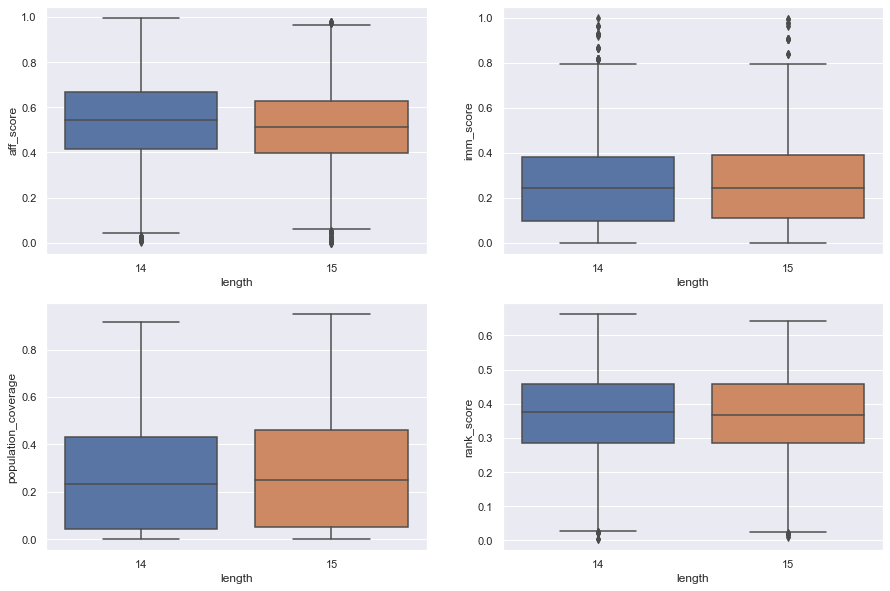

In [11]:
#NOT important? Cause after removing 25aa epitopes no significant changes are seen between epitopes of different lengths

fig, axes = plt.subplots(2,2, figsize = (15, 10)) 

for param, ax in zip(['aff_score', 'imm_score', 'population_coverage', 'rank_score'], axes.flatten()):
    sns.boxplot(data=df, x='length', y=param, ax = ax)
#the length matters mostly for pop_coverage  

<AxesSubplot: xlabel='length', ylabel='rank_score'>

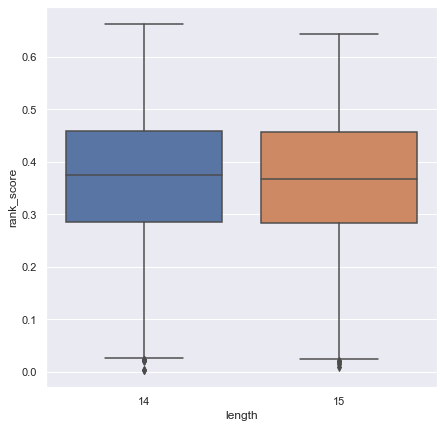

In [24]:
#important ----similar to previous graph, so NOT important? (and if to include, only this one, not the previous)
plt.figure(figsize = (7,7))
sns.boxplot(data=df, x='length', y='rank_score')

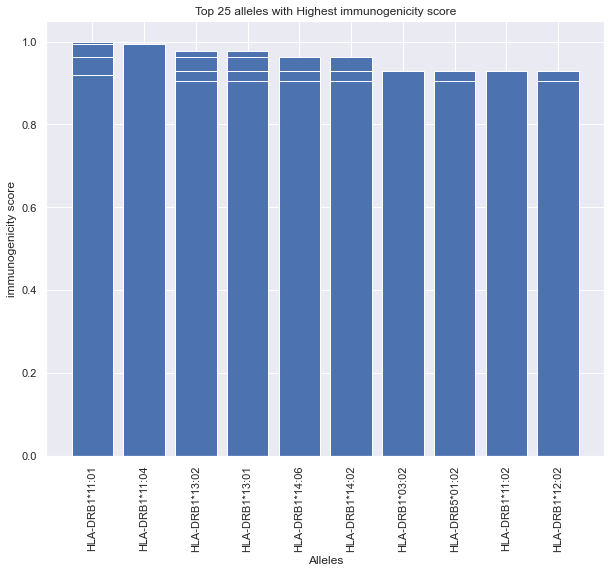

In [25]:
sorted_data = df.sort_values('imm_score', ascending=False)
plt.figure(figsize=(10, 8))

# Get the top 25 peptides with the highest immunogenicity_score
top_25_peptides = sorted_data.head(25)['allele']

# Plot the antigen scores of the top 25 peptides
plt.bar(top_25_peptides, sorted_data.head(25)['imm_score'])
plt.xlabel('Alleles')
plt.ylabel('immunogenicity score')
plt.title('Top 25 alleles with Highest immunogenicity score')
plt.xticks(rotation=90)
plt.show()

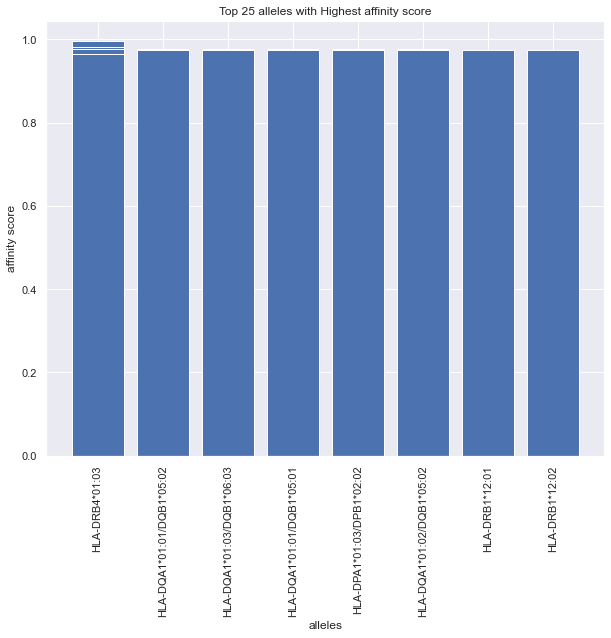

In [26]:
sorted_data = df.sort_values('aff_score', ascending=False)
plt.figure(figsize=(10, 8))

# Get the top 25 peptides with the highest immunogenicity_score
top_25_peptides = sorted_data.head(25)['allele']

# Plot the antigen scores of the top 25 peptides
plt.bar(top_25_peptides, sorted_data.head(25)['aff_score'])
plt.xlabel('alleles')
plt.ylabel('affinity score')
plt.title('Top 25 alleles with Highest affinity score')
plt.xticks(rotation=90)
plt.show()

In [27]:
num_features = ['population_coverage', 'sw_mixmhcii_aff', 
       'aff_score', 'imm_score', 'rank_score']

In [28]:
def top10_peptides_alleles_barGraph(parameter):
    af = df.groupby(['peptide', 'allele'])[parameter].mean().sort_values(ascending = False)[:10]
    li = []
    for i in range(len(af)):
        c = ' :: '.join(af.index[i])
        li.append(c)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=li, y=af.values[:10])
    plt.title(f'Top 10 Peptides-Alleles with Highest {parameter}')
    plt.ylabel(parameter)
    plt.xticks(rotation=90)
    plt.show()

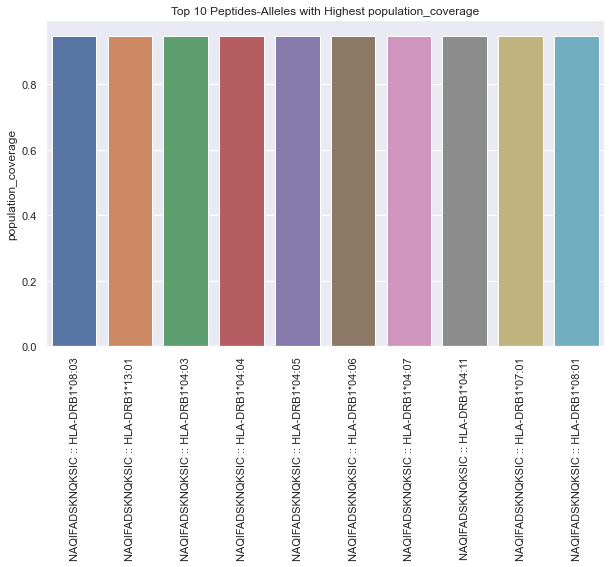

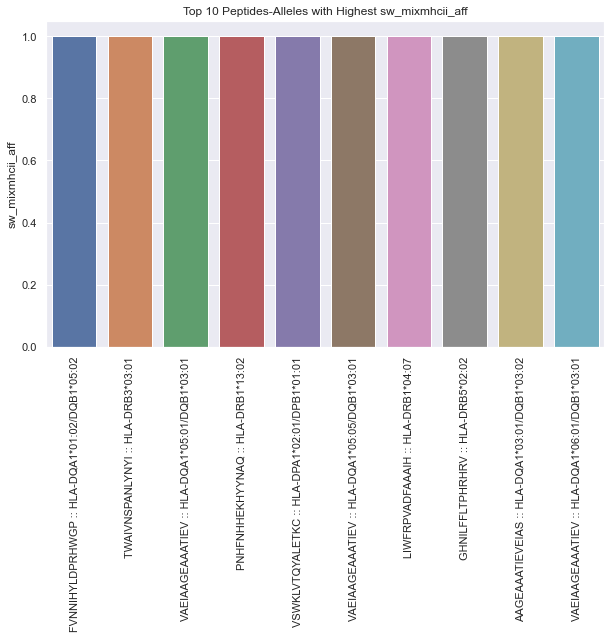

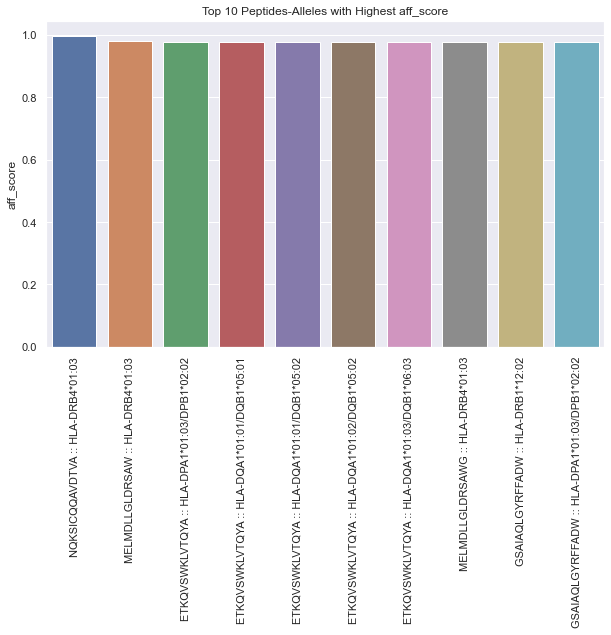

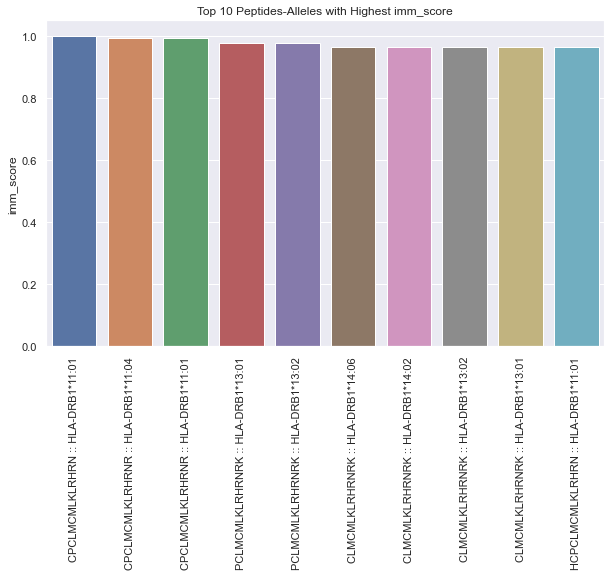

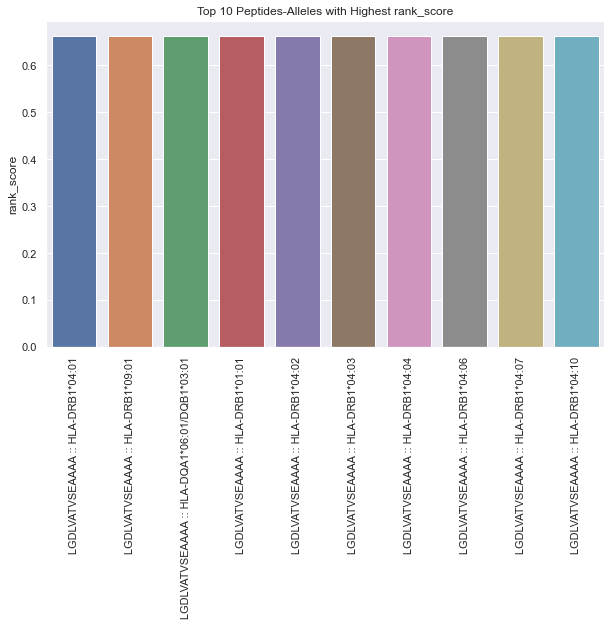

In [29]:
#important
for param in num_features:
    top10_peptides_alleles_barGraph(param)

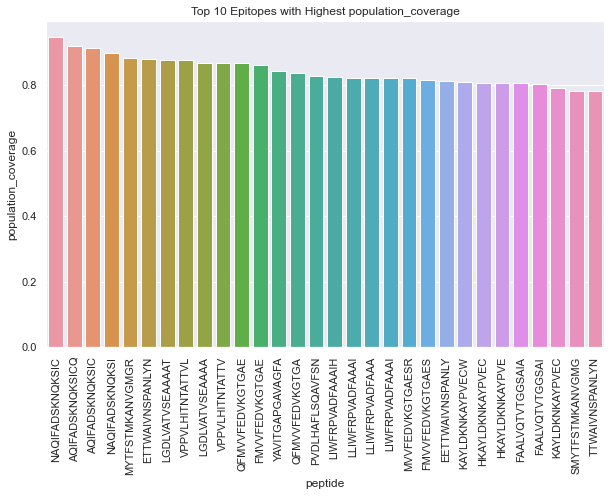

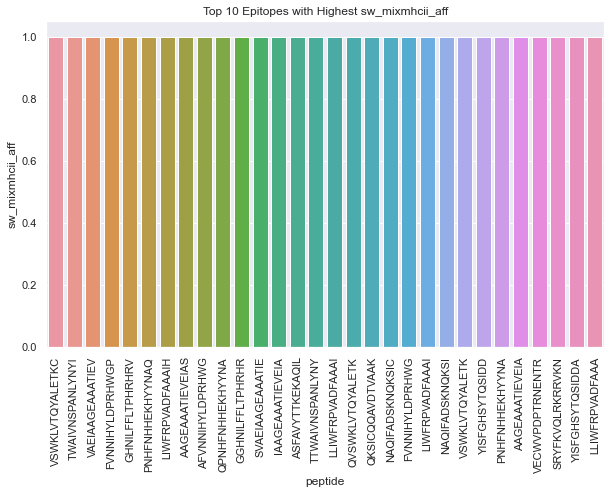

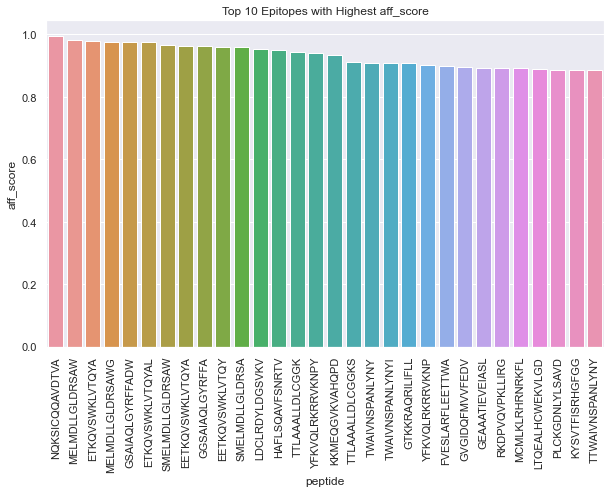

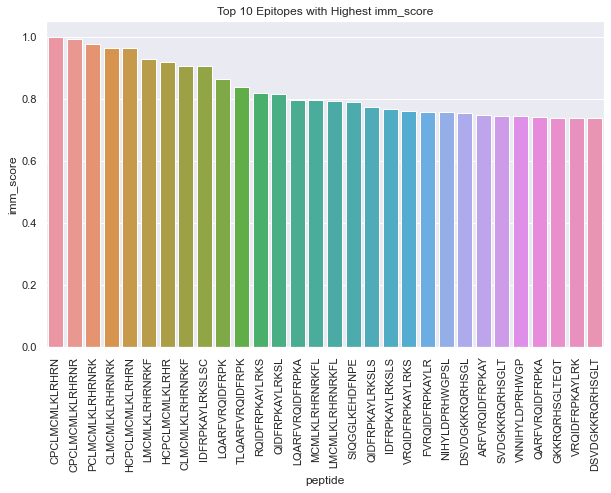

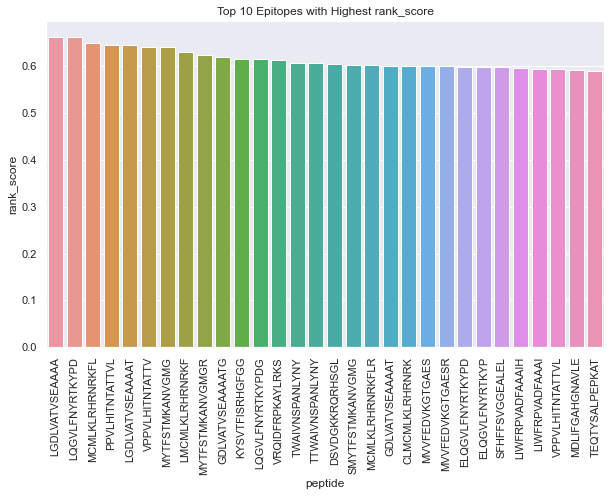

In [30]:
#important
#top30 epitopes analysis
def top30_peptides_rank_barGraph(parameter):
    af = df.groupby(['peptide'])[parameter].max().sort_values(ascending = False)[:30]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=af.index[:30], y=af[:30])
    plt.title(f'Top 10 Epitopes with Highest {parameter}')
    plt.ylabel(parameter)
    plt.xticks(rotation=90)
    plt.show()
for param in num_features:
    top30_peptides_rank_barGraph(param)

Important to mention that top epitopes for rank are different from top epitopes with highest imm and aff.
Top pop_coverage epitopes make it to the highest rank though

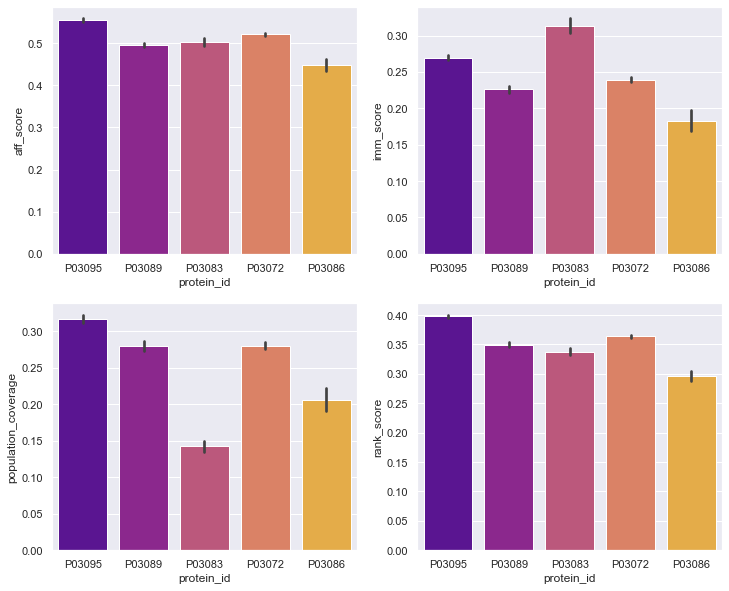

In [12]:
#scores by protein - overview - IMPORTANT?
fig, axes = plt.subplots(2,2, figsize = (12, 10)) 

for param, ax in zip(['aff_score', 'imm_score', 'population_coverage', 'rank_score'], axes.flatten()):
    sns.barplot(x ='protein_id', y =param, data = df,
            palette ='plasma', ax = ax)
    
    
#P083 has highest imm score and lowest pop_cov score. 
#The rest of the scores have similar distribution, with 095 performing the best and the rest have slightly lower scores

In [32]:
df['diff_bw_aff_score_mix_score'] = np.abs(df['aff_score'] - df['sw_mixmhcii_aff'])

def labelquantile(diff):
    if diff <= np.quantile(df['diff_bw_aff_score_mix_score'], 0.25):
        return 'Less than 25%'
    elif diff > np.quantile(df['diff_bw_aff_score_mix_score'], 0.25) and diff <=  np.quantile(df['diff_bw_aff_score_mix_score'], 0.5):
        return 'Less than 50%'
    elif diff > np.quantile(df['diff_bw_aff_score_mix_score'], 0.5) and diff <= np.quantile(df['diff_bw_aff_score_mix_score'], 0.75):
        return 'Less than 75%'
    else:
        return 'Greater than 75%'
    
df['Aff_Quantile'] = df['diff_bw_aff_score_mix_score'].apply(labelquantile)
df.head()

,peptide,mixmhcii_aff,allele,protein_id,number_binding_alleles,protein_sequence,antigen_score,probable_type,population_coverage,genot_freq,length,genot_freq_sum_per_epitope,s_mixmhcii_aff,sw_mixmhcii_aff,aff_score,imm_score,rank_score,diff_bw_aff_score_mix_score,Aff_Quantile
0,LGDLVATVSEAAAA,7.910,HLA-DQA1*03:01/DQB1*04:01,P03095,48,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.6301,ANTIGEN,0.869,0.00,14,66.33,0.92090,0.209092,0.763835,0.318619,0.661819,0.554743,Greater than 75%
1,LGDLVATVSEAAAA,8.370,HLA-DRB1*04:10,P03095,48,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.6301,ANTIGEN,0.869,0.05,14,66.33,0.91630,0.163071,0.763835,0.318619,0.661819,0.600763,Greater than 75%
2,LGDLVATVSEAAAA,0.641,HLA-DRB1*15:03,P03095,48,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.6301,ANTIGEN,0.869,0.02,14,66.33,0.99359,0.936310,0.763835,0.318619,0.661819,0.172476,Less than 50%
3,LGDLVATVSEAAAA,1.020,HLA-DRB1*08:02,P03095,48,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.6301,ANTIGEN,0.869,0.22,14,66.33,0.98980,0.898393,0.763835,0.318619,0.661819,0.134559,Less than 50%
4,LGDLVATVSEAAAA,0.197,HLA-DRB1*04:06,P03095,48,MGAALALLGDLVATVSEAAAATGFSVAEIAAGEAAATIEVEIASLA...,0.6301,ANTIGEN,0.869,0.06,14,66.33,0.99803,0.980730,0.763835,0.318619,0.661819,0.216895,Less than 75%


<AxesSubplot: xlabel='aff_score', ylabel='sw_mixmhcii_aff'>

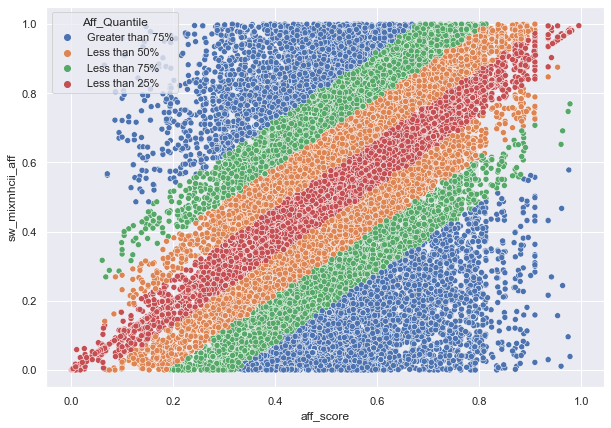

In [33]:
#Not important
plt.figure(figsize = (10, 7))
sns.scatterplot(data = df, x = 'aff_score', y = 'sw_mixmhcii_aff', hue = 'Aff_Quantile')

<AxesSubplot: ylabel='diff_bw_aff_score_mix_score'>

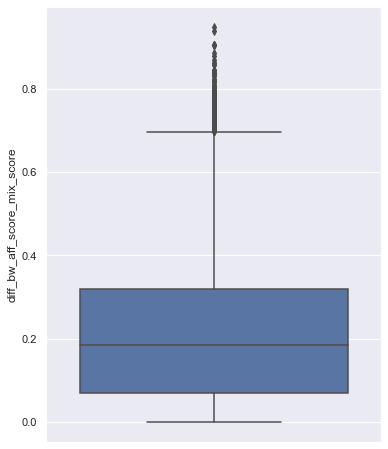

In [34]:
plt.figure(figsize = (6, 8))
sns.boxplot(data = df, y = 'diff_bw_aff_score_mix_score')

<AxesSubplot: xlabel='length', ylabel='diff_bw_aff_score_mix_score'>

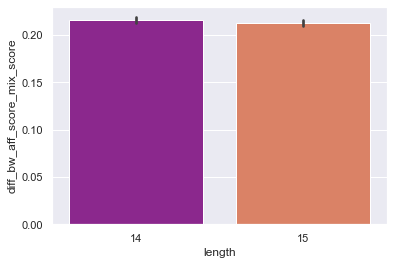

In [35]:
#Not an important graph, no significant diff
sns.barplot(x ='length', y ='diff_bw_aff_score_mix_score', data = df,
            palette ='plasma')

<AxesSubplot: xlabel='protein_id', ylabel='diff_bw_aff_score_mix_score'>

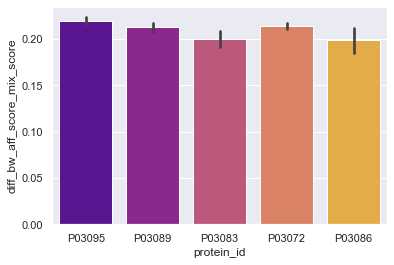

In [36]:
#Not an important graph, no significant diff
sns.barplot(x ='protein_id', y ='diff_bw_aff_score_mix_score', data = df,
            palette ='plasma')

In [37]:
#SCORES SUMMARY for 30 top-ranked epitopes
top_ep_scores = df.groupby(['peptide'])['rank_score', 'imm_score', 'aff_score', 'population_coverage'].max().sort_values(by='rank_score', ascending = False)[:30]
top_ep_scores

,rank_score,imm_score,aff_score,population_coverage
peptide,,,,
LGDLVATVSEAAAA,0.661819,0.318619,0.763835,0.8690
LQGVLFNYRTKYPD,0.661425,0.617516,0.741325,0.5988
MCMLKLRHRNRKFL,0.649551,0.796015,0.892391,0.1793
PPVLHITNTATTVL,0.644950,0.470065,0.690803,0.7587
LGDLVATVSEAAAAT,0.643417,0.317607,0.711312,0.8787
VPPVLHITNTATTV,0.640680,0.577265,0.517227,0.8687
MYTFSTMKANVGMG,0.639800,0.310073,0.787345,0.7728
LMCMLKLRHRNRKF,0.629769,0.928297,0.742825,0.1805
MYTFSTMKANVGMGR,0.623899,0.205097,0.742325,0.8848


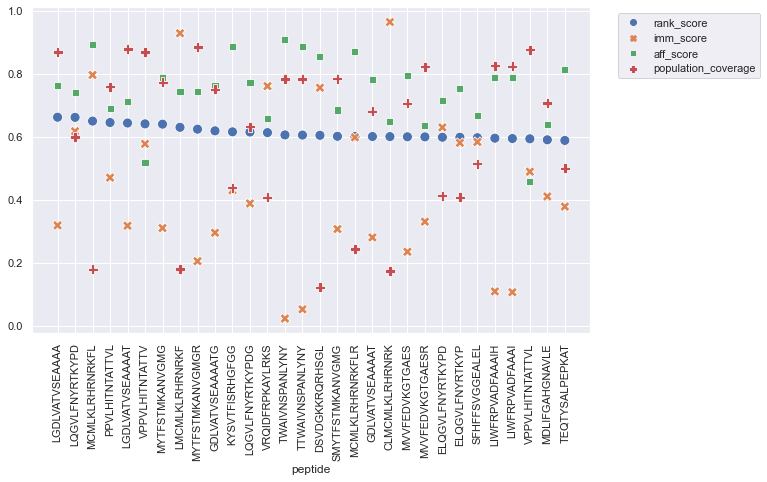

In [38]:
# create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_ep_scores, s=100)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()
